In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv('/content/top-5000-youtube-channels.csv')
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


1.**Display first 5 rows of this dataset**

In [4]:
df.head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


2. **Display last 5 rows of this dataset**

In [5]:
df.tail(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


**3. Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [8]:
print(f"Rows={df.shape[0]}and columns ={df.shape[1]}")

Rows=5000and columns =6


**4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each
Column**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


**5. Get Overall Statistics About The Dataframe**

In [13]:
df.describe()

,Video views
count,5.000000e+03
mean,1.071449e+09
std,2.003844e+09
min,7.500000e+01
25%,1.862329e+08
50%,4.820548e+08
75%,1.124368e+09
max,4.754884e+10


**6. Data Cleaning (Replace '--' to NaN)**


In [14]:
df[df['Video Uploads']=='--']

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
267,268th,,MidnightXChannel,--,--,190256974
517,518th,,Dusama Pets TV,--,--,91601494
2323,"2,324th",,Random,--,12275,17897584
3072,"3,073rd",,Boram Tube Toy Shcool [보람튜브…,--,726527,205555289
3247,"3,248th",,atheer sultan,--,--,79663674
4898,"4,899th",,ExzoticSlice,--,99785,9745292


In [15]:
df['Video Uploads']=df['Video Uploads'].replace('--,np.nan')

In [16]:
df['Subscribers']=df['Subscribers'].replace('--,np.nan',regex=True)

**7. Check Null Values In The Dataset**

In [26]:
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [24]:
df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

**8. Data Cleaning [ Video Uploads & Subscribers ]**

In [28]:
# Convert non-numeric values to NaN
df["Video Uploads"] = pd.to_numeric(df["Video Uploads"], errors='coerce')

# Convert the column to int64, replacing NaN values with 0
df["Video Uploads"] = df["Video Uploads"].fillna(0).astype("int64")

In [29]:
# Convert non-numeric values to NaN
df["Subscribers"] = pd.to_numeric(df["Subscribers"], errors='coerce')

# Convert the column to int64, replacing NaN values with 0
df["Subscribers"] = df["Subscribers"].fillna(0).astype("int64")

In [30]:
df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads     int64
Subscribers       int64
Video views       int64
dtype: object

**9. Find Average Views For Each Channel**

In [33]:
round(df['Video views'].mean())

1071449400

In [34]:
df

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


**10. Find Out Top Five Channels With Maximum Number of Video Uploads**

In [35]:
df[['Channel name','Video Uploads']].sort_values('Video Uploads',ascending=False).head(5)

,Channel name,Video Uploads
3453,AP Archive,422326
1149,YTN NEWS,355996
2223,SBS Drama,335521
323,GMA News,269065
2956,MLB,267649


**11. Find Correlation Matrix**

In [36]:
df.corr()

,Video Uploads,Subscribers,Video views
Video Uploads,1.000000,0.019646,0.092552
Subscribers,0.019646,1.000000,0.792112
Video views,0.092552,0.792112,1.000000


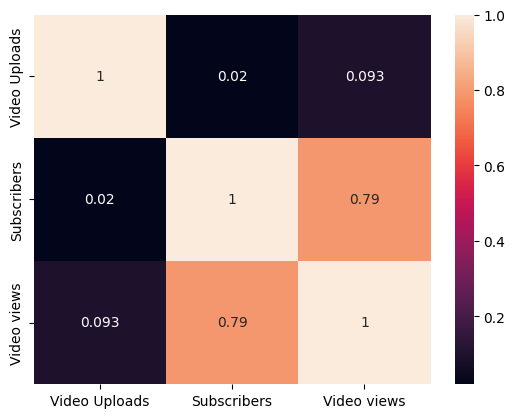

In [37]:
sns.heatmap(df.corr(), annot=True)
plt.show() # Subsribers and Video Views has higher correlation

**12. Which Grade Has A Maximum Number of Video Uploads?**

In [43]:
df.groupby('Grade')['Video Uploads'].sum().sort_values(ascending=False).head(1)

Grade
B+     8826581
Name: Video Uploads, dtype: int64

**13. Which Grade Has The Highest Average Views?**

In [45]:
df.groupby("Grade")["Video views"].mean().sort_values(ascending=False)

Grade
A++     2.119909e+10
A+      6.053121e+09
A       2.361317e+09
A-      1.041149e+09
B+      5.265217e+08
        9.912005e+07
Name: Video views, dtype: float64

**14. Which Grade Has The Highest Number of Subscribers**

In [48]:
df.groupby('Grade')['Subscribers'].mean().sort_values(ascending=False)

Grade
A++     2.228176e+07
A+      1.144092e+07
A       4.757114e+06
A-      2.571687e+06
B+      1.413679e+06
        1.397645e+05
Name: Subscribers, dtype: float64

**15. Which Grade Has The Highest Video Views?**

In [51]:
df.groupby('Grade')['Video views'].mean().sort_values(ascending=False)

Grade
A++     2.119909e+10
A+      6.053121e+09
A       2.361317e+09
A-      1.041149e+09
B+      5.265217e+08
        9.912005e+07
Name: Video views, dtype: float64